In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib notebook


In [3]:
def Func(X,t,gamma,delta):
    phi, v = X
    dXdt = [v, gamma-delta*v - np.sin(phi)]
    return dXdt

def VF(X,Y,delta):
    u = X*(1-Y)
    v = delta*(X-1)*Y
    return u,v


def modfunc(angles):
    angles = np.fmod(angles,2*np.pi)
    angles[angles>np.pi] -= 2*np.pi
    angles[angles<-np.pi] += 2*np.pi
#     normalized_angles = np.fmod(angles + np.pi, 2 * np.pi) - np.pi
#     discontinuities = np.where(np.abs(np.diff(normalized_angles)) >= np.pi)[0]
#     normalized_angles_with_nans = np.insert(normalized_angles, discontinuities+1, np.nan)


    return angles




In [4]:
n_phi = 20
n_t = 20000
tList = np.linspace(0, 100, n_t)
phi_0List = np.linspace(-np.pi*0.99,np.pi*0.99,n_phi)
v0List = np.linspace(-3,3,n_phi)
X_0 = np.array([0,0],dtype="float")
delta = 0.0
gamma = 0.0


In [6]:
solList  = np.zeros((n_t,2,n_phi))
for i,phi in enumerate(phi_0List):
    X_0[1] = v0List[i]
    
    sol = odeint(Func, X_0, tList, args=(gamma,delta,))
    sol[:,0] = modfunc(sol[:,0])
    solList[:,:,i] = sol
    
    

<IPython.core.display.Javascript object>


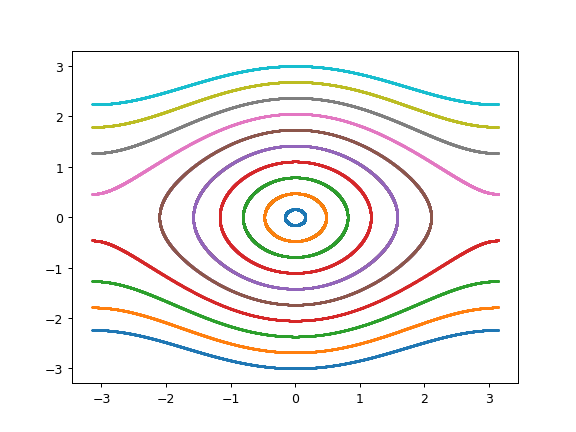

In [7]:
fig = plt.figure()

for i in range(n_phi):
    sol = solList[:,:,i]
    plt.plot(sol[:,0],sol[:,1],"o",markersize=0.4)

<IPython.core.display.Javascript object>


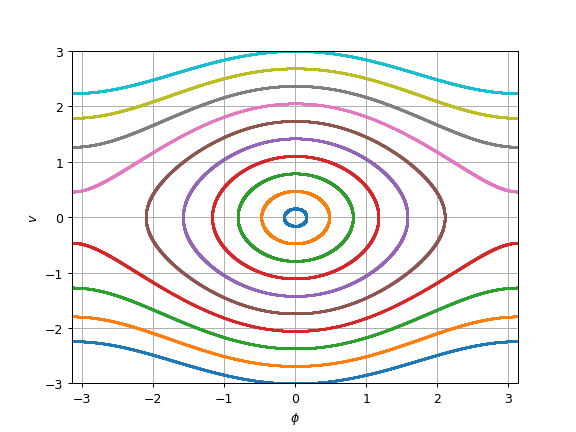

<IPython.core.display.Javascript object>


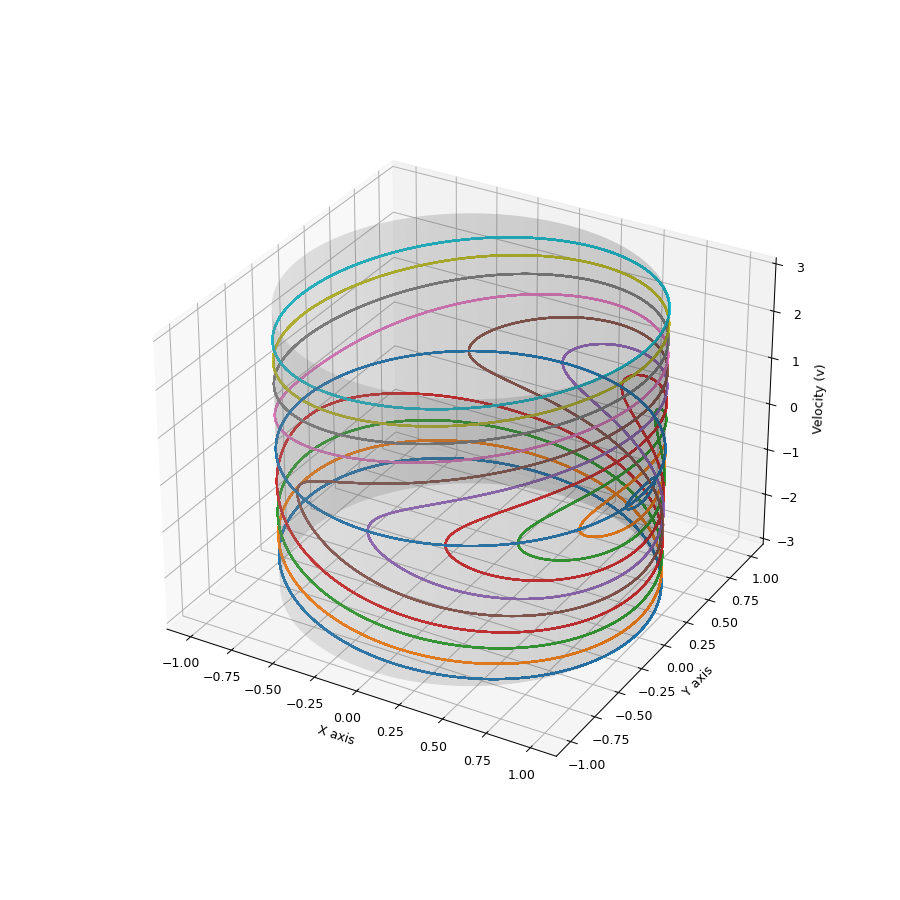

In [5]:

    
# y = 1-np.cos(sol[:,0])
# x = np.sin(sol[:,0])
# sol[:,0] = modfunc(sol[:,0])



plt.xlabel("$\phi$")
plt.ylabel("$v$")
plt.grid()
plt.xlim([-np.pi,np.pi])
plt.ylim([-3,3])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


# Example data
angles = np.linspace(-np.pi, np.pi, 100)  # Angle array
velocities = 3*np.sin(angles)  # Replace with your velocity data
radius = 1

# Create mesh for the cylinder
height = np.linspace(min(velocities), max(velocities), 100)  # Adjust the range of your velocity data
theta = np.linspace(-np.pi, np.pi, 100)  # Angle array for the mesh
theta_grid, z_grid = np.meshgrid(theta, height)
x_grid = radius * np.cos(theta_grid)
y_grid = radius * np.sin(theta_grid)

# Convert cylindrical to Cartesian coordinates for the curve
x = radius * np.cos(angles)
y = radius * np.sin(angles)
z = velocities


# Plot the surface of the cylinder
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.2, color='grey')  # Set transparency with alpha


for i in range(n_phi):
    angles = solList[:,0,i]  # Replace with your angle data
    velocities = 1*solList[:,1,i]  # Replace with your velocity data
    radius = 1
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    z = velocities
    ax.plot(x, y, z, label='Curve on cylinder')



ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Velocity (v)')
#ax.set_zlim([-2,2])

# Display the plot
plt.show()


data = solList[:,0,2]
x = np.cos(data)
y = np.sin(data)
plt.plot(x,y)